In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [53]:
data=pd.read_csv(r"/content/drive/MyDrive/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [54]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [55]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [57]:
data.shape

(20640, 10)

In [58]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [59]:
#checking missing values
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [81]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [82]:
data  = data[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]

In [87]:
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,6.781058,129.0,322.0,126.0,8.3252,452600.0
1,21.0,8.867850,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,7.291656,190.0,496.0,177.0,7.2574,352100.0
3,52.0,7.150701,235.0,558.0,219.0,5.6431,341300.0
4,52.0,7.395108,280.0,565.0,259.0,3.8462,342200.0


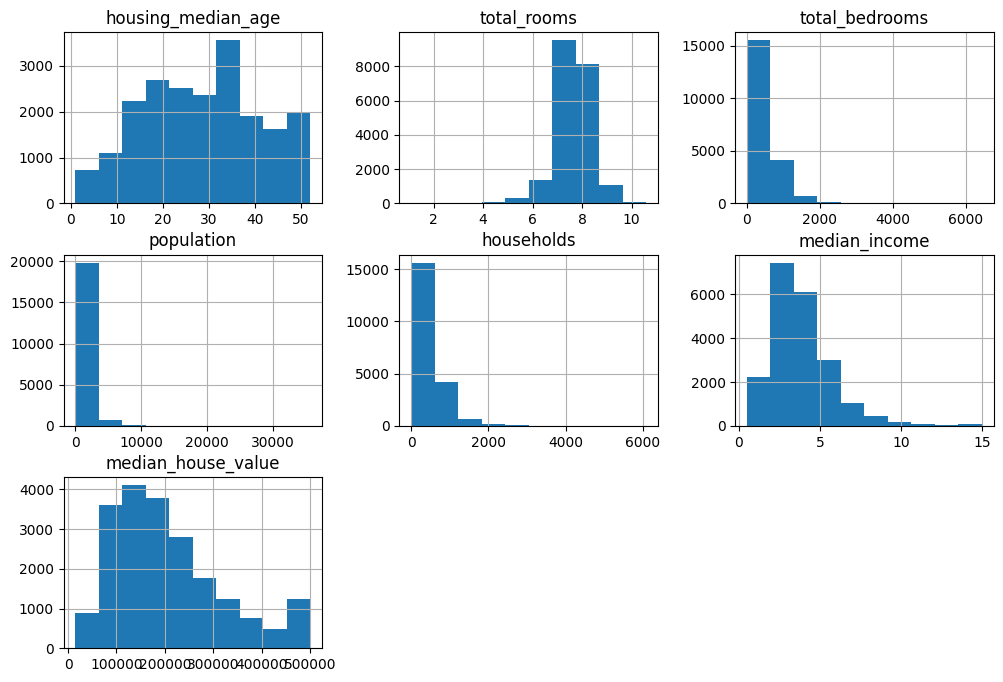

In [88]:
data.hist(figsize=(12,8))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7e6154f185c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e614ff1cc80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e6154f1a390>],
 'medians': [<matplotlib.lines.Line2D at 0x7e614ff1f530>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e61541768d0>],
 'means': []}

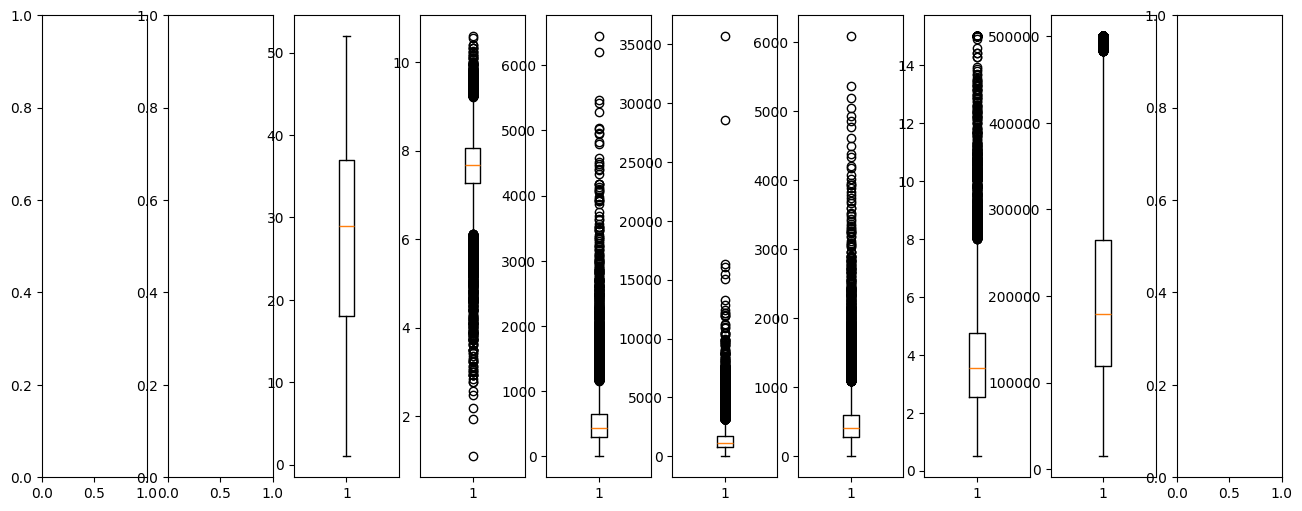

In [89]:
fig,axs=plt.subplots(1,10,figsize=(16,6))       #1=row means 1 row, 4=columns

axs[2].boxplot(data.housing_median_age)
axs[3].boxplot(data.total_rooms)
axs[4].boxplot(data.total_bedrooms)
axs[5].boxplot(data.population)
axs[6].boxplot(data.households)
axs[7].boxplot(data.median_income)
axs[8].boxplot(data.median_house_value)

{'whiskers': [<matplotlib.lines.Line2D at 0x7e61547dedb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e6154b9e750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e6154f94f20>],
 'medians': [<matplotlib.lines.Line2D at 0x7e6154b9e3f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e615480de80>],
 'means': []}

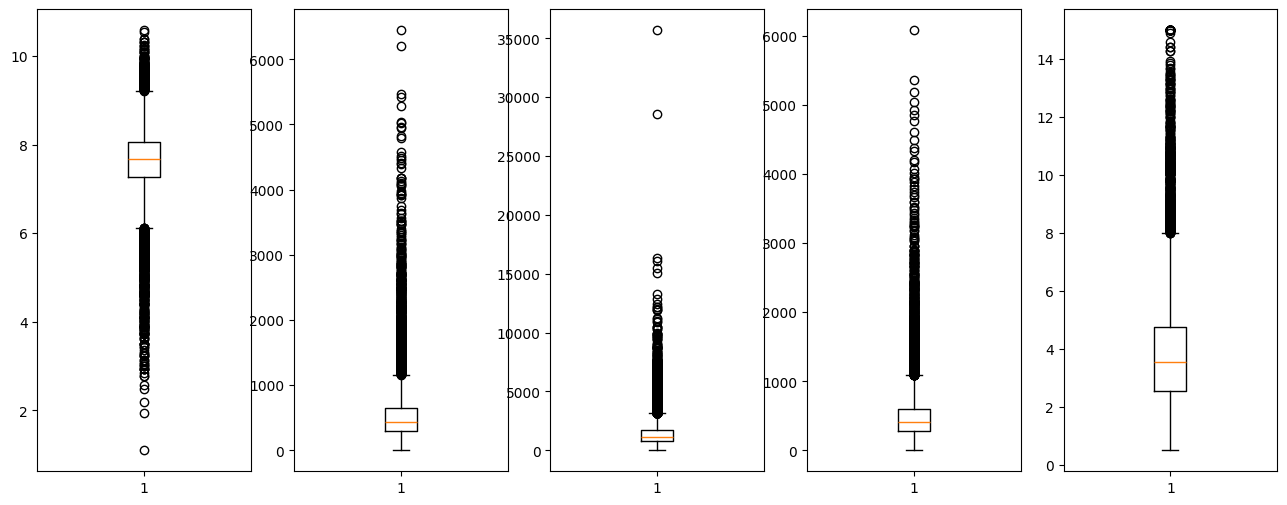

In [90]:
fig,axs=plt.subplots(1,5,figsize=(16,6))
axs[0].boxplot(data.total_rooms)
axs[1].boxplot(data.total_bedrooms)
axs[2].boxplot(data.population)
axs[3].boxplot(data.households)
axs[4].boxplot(data.median_income)

In [92]:
data.isnull().sum()

,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [91]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(),inplace=True)

/tmp/ipython-input-1013417500.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(),inplace=True)
/tmp/ipython-input-1013417500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_bedrooms'].fillna(data['total_bedrooms'].median(),inplace=True)


In [65]:
data.drop_duplicates(inplace=True)

In [66]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [67]:
data.total_bedrooms

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20635,374.0
20636,150.0
20637,485.0
20638,409.0


In [93]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
IQR

,0
housing_median_age,19.000000
total_rooms,0.776384
total_bedrooms,346.250000
population,938.000000
households,325.000000
median_income,2.179850
median_house_value,145125.000000


In [94]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [71]:
data['total_rooms']=np.log1p(data['total_rooms'])

In [95]:
upper_limit,lower_limit

(housing_median_age        65.500000
 total_rooms                9.219416
 total_bedrooms          1162.625000
 population              3132.000000
 households              1092.500000
 median_income              8.013025
 median_house_value    482412.500000
 dtype: float64,
 housing_median_age      -10.500000
 total_rooms               6.113881
 total_bedrooms         -222.375000
 population             -620.000000
 households             -207.500000
 median_income            -0.706375
 median_house_value   -98087.500000
 dtype: float64)

In [98]:
data_cleaned = data[~ ((data <lower_limit)|(data >upper_limit)).any(axis=1)]

In [100]:
data_cleaned.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2,52.0,7.291656,190.0,496.0,177.0,7.2574,352100.0
3,52.0,7.150701,235.0,558.0,219.0,5.6431,341300.0
4,52.0,7.395108,280.0,565.0,259.0,3.8462,342200.0
5,52.0,6.824374,213.0,413.0,193.0,4.0368,269700.0
6,52.0,7.838343,489.0,1094.0,514.0,3.6591,299200.0


In [75]:
data.shape #original shape

(20640, 10)

In [101]:
data_cleaned.shape

(17147, 7)

In [79]:
data_cleaned=pd.get_dummies(data_cleaned,columns=['ocean_proximity'],drop_first=True,dtype=int)

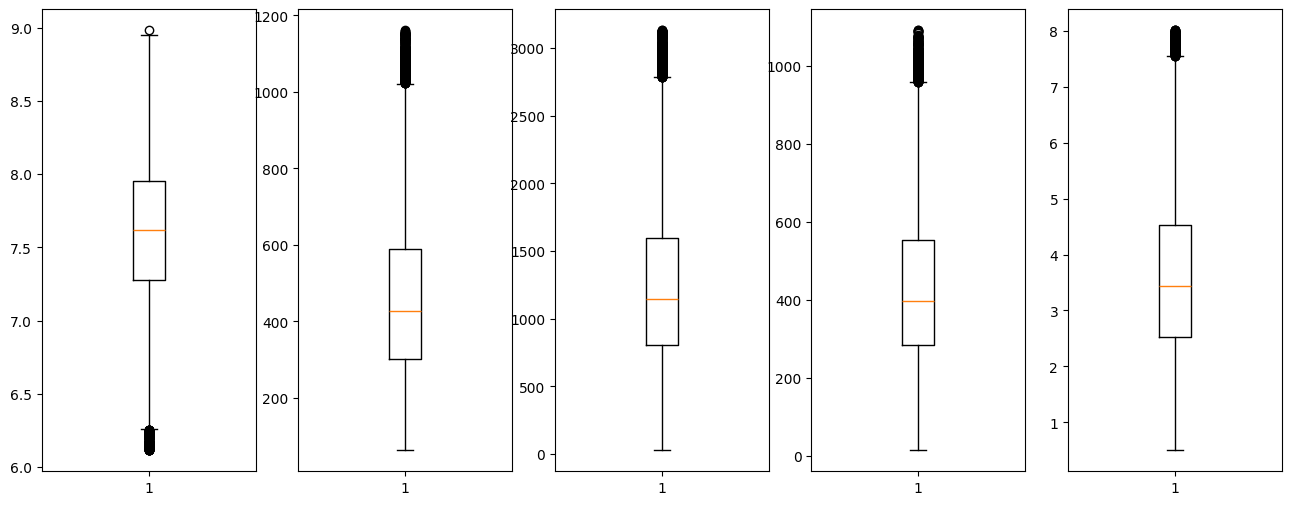

In [102]:
fig,axs=plt.subplots(1,5,figsize=(16,6))
axs[0].boxplot(data_cleaned.total_rooms)
axs[1].boxplot(data_cleaned.total_bedrooms)
axs[2].boxplot(data_cleaned.population)
axs[3].boxplot(data_cleaned.households)
axs[4].boxplot(data_cleaned.median_income)
plt.show()

In [103]:
min(data_cleaned.total_rooms)

6.115892125483034

In [104]:
data_cleaned.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000
mean,29.266636,7.598029,463.909080,1246.754884,434.380358,3.619391,188877.902724
std,12.185335,0.505893,216.378383,595.824769,202.183737,1.444167,93957.771634
min,1.000000,6.115892,63.000000,27.000000,15.000000,0.499900,14999.000000
25%,19.000000,7.276556,301.000000,804.000000,284.000000,2.528800,114600.000000
50%,30.000000,7.618742,426.000000,1145.000000,398.000000,3.435900,171800.000000
75%,37.000000,7.955074,589.000000,1596.000000,554.000000,4.535700,244000.000000
max,52.000000,8.982436,1161.000000,3132.000000,1092.000000,8.011300,482200.000000


array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

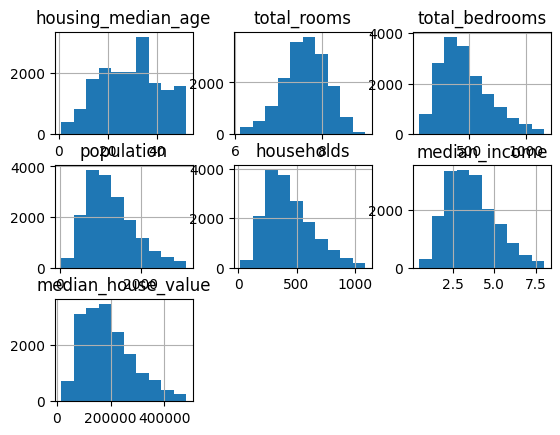

In [105]:
data_cleaned.hist()

In [106]:
data_cleaned.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2,52.0,7.291656,190.0,496.0,177.0,7.2574,352100.0
3,52.0,7.150701,235.0,558.0,219.0,5.6431,341300.0
4,52.0,7.395108,280.0,565.0,259.0,3.8462,342200.0
5,52.0,6.824374,213.0,413.0,193.0,4.0368,269700.0
6,52.0,7.838343,489.0,1094.0,514.0,3.6591,299200.0


In [111]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler=StandardScaler()
data["housing_median_age"]=scaler.fit_transform(data[["housing_median_age"]])
data["total_rooms"]=scaler.fit_transform(data[["total_rooms"]])
data["total_bedrooms"]=scaler.fit_transform(data[["total_bedrooms"]])
data["median_house_value"]=scaler.fit_transform(data[["median_house_value"]])
data["population"]=scaler.fit_transform(data[["population"]])
data["median_income"]=scaler.fit_transform(data[["median_income"]])
data["median_house_value"]=scaler.fit_transform(data[["median_house_value"]])

/tmp/ipython-input-2544604606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["housing_median_age"]=scaler.fit_transform(data[["housing_median_age"]])
/tmp/ipython-input-2544604606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["total_rooms"]=scaler.fit_transform(data[["total_rooms"]])
/tmp/ipython-input-2544604606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [115]:
x=data[["housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]]
y=data["median_house_value"]

In [116]:
x.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.982143,-1.131133,-0.972476,-0.974429,126.0,2.344766
1,-0.607019,1.651357,1.357143,0.861439,1138.0,2.332238
2,1.856182,-0.450310,-0.827024,-0.820777,177.0,1.782699
3,1.856182,-0.638257,-0.719723,-0.766028,219.0,0.932968
4,1.856182,-0.312370,-0.612423,-0.759847,259.0,-0.012881


In [117]:
x.shape,y.shape

((20640, 6), (20640,))

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [120]:
x_train.shape,x_test.shape

((16512, 6), (4128, 6))

In [125]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [122]:
model=LinearRegression()
#now fit this model to our data
model.fit(x_train,y_train)

LinearRegression()

In [123]:
model.intercept_,model.coef_

(np.float64(-0.6168543165257006),
 array([ 0.21907423, -0.03965728,  0.06523098, -0.41998322,  0.0012336 ,
         0.72136957]))

In [127]:
predicted_val=model.predict(x_test)


In [128]:
predicted_val

array([-1.05563446, -0.46784974,  0.82355989, ...,  1.95981888,
       -0.26411855, -0.4828898 ])

In [129]:
mean_squared_error(y_test,predicted_val)*100            #should be near to 0

45.183610270417255

In [132]:
r2_score(y_test,predicted_val)                #should be near to 1

0.5408742551877326